In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train= pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


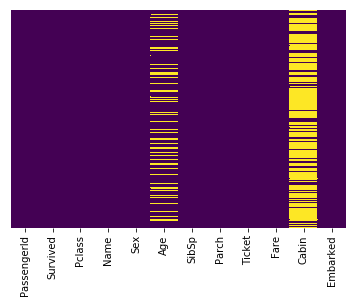

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
sns.set_style('whitegrid')

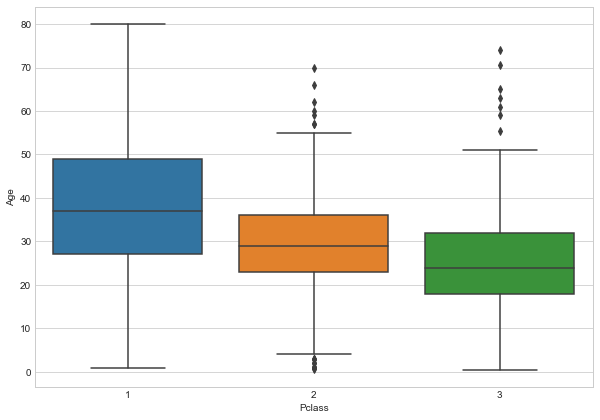

In [7]:
plt.figure(figsize=(10,7))
sns.boxplot('Pclass','Age',data=train)

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [9]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

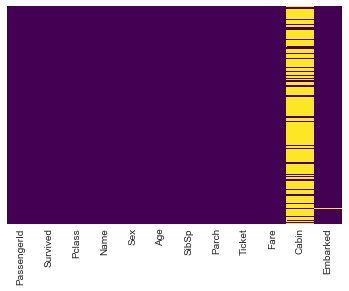

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
train.drop('Cabin',axis=1,inplace=True)

In [14]:
#drop all missing rows
train.dropna(inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [17]:
#multi-collinearly male is negation of female
sex=pd.get_dummies(train['Sex'], drop_first=True)

In [28]:
embark=pd.get_dummies(train['Embarked'])#,drop_first=True)

In [29]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
#adding columns to train DataFrame
train=pd.concat([train,sex,embark],axis=1)

In [32]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [33]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [54]:
#try dummy(catefory) on Pclass and see hor Ml algorithm react to leading Pclass as columns vs separation of category.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 10 columns):
PassengerId    331 non-null int64
Pclass         331 non-null int64
Name           331 non-null object
Sex            331 non-null object
Age            331 non-null float64
SibSp          331 non-null int64
Parch          331 non-null int64
Ticket         331 non-null object
Fare           331 non-null float64
Embarked       331 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 28.4+ KB


,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0
3,3,27.0,0,0,8.6625,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,1


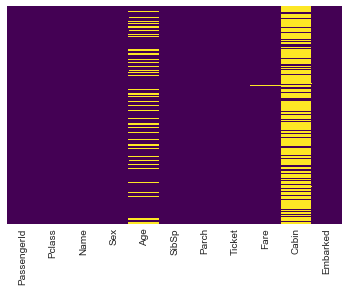

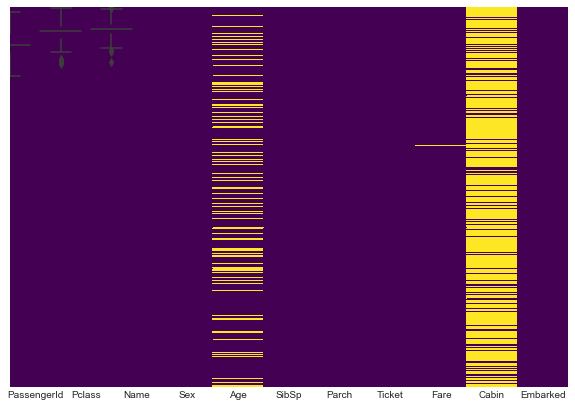

In [55]:
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

test= pd.read_csv('titanic_test.csv')

test.head()

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

sns.set_style('whitegrid')

plt.figure(figsize=(10,7))
sns.boxplot('Pclass','Age',data=test)

def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

test.drop('Cabin',axis=1,inplace=True)

#drop all missing rows
test.dropna(inplace=True)

test.info()

#multi-collinearly male is negation of female
sex=pd.get_dummies(test['Sex'], drop_first=True)

embark=pd.get_dummies(test['Embarked'])#,drop_first=True)

embark.head()

#adding columns to train DataFrame
test=pd.concat([test,sex,embark],axis=1)

test.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

test.head()

#try dummy(catefory) on Pclass and see hor Ml algorithm react to leading Pclass as columns vs separation of category.




In [56]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [41]:
from sklearn.cross_validation import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel=LogisticRegression()

In [46]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
predictions=logmodel.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [52]:
#alternative
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)